In [236]:
import numpy as np
from astropy.io import ascii
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table

import astropy.coordinates as coord

In [258]:
t = Table.read('Milky_Way_GCs.dat', format='ascii')

r = 3.1 #from powerpoint
A = r*ebv #attenuation
Mv = 0.66 
d = 10**((mv-Mv-A+5)/5)/1000  # in kpc
t.add_column(d, name = 'distance')

In [259]:
ra = coord.Angle(t["RA(2000)"], unit=u.hour)
dec = coord.Angle(t["DEC(2000)"], unit=u.degree)
dist = coord.Distance(t["distance"],unit=u.kpc)

c = SkyCoord(ra=ra, dec=dec, distance=dist)

In [260]:
x = c.cartesian.x
y = c.cartesian.y
z = c.cartesian.z

medx = np.median(x)
medy = np.median(y)
medz = np.median(z)

#print(medx,medy,medz)

center = SkyCoord(x=medx,y=medy,z=medz, representation_type='cartesian')

csphere = center.spherical

print(csphere.lon.hms)
print(csphere.lat.deg)
print(csphere.distance)


hms_tuple(h=17.0, m=41.0, s=26.59960235135884)
-30.087189538427186
7.214095344870226 kpc


# The center of the galaxy from my calculations is 
## RA = 17h 41m 27 s (uncertainty?)
## DEC = -30 deg
## 7.21 kpc away

actual values are 
RA = 17h 45.6m 
Dec = -28.93⁰
Dist = 7.9

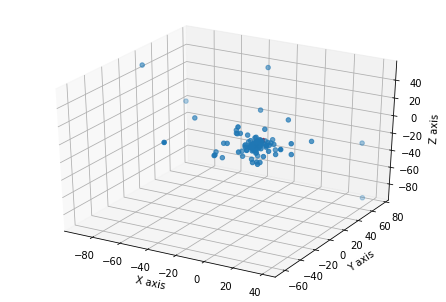

In [242]:
%matplotlib inline
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter3D(0,0,0,c="red",marker='X')
ax.scatter3D(medx,medy,medz,c="black",marker='x')
ax.scatter3D(x,y,z)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
pyplot.show()

# metal poor vs metal rich?
[Fe/H] < -0.8

In [243]:
mask = t['[Fe/H]'] < -0.8
unmask = t['[Fe/H]']>-0.8

poor = t[mask]
rich = t[unmask]

pra = coord.Angle(poor["RA(2000)"], unit=u.hour)
pdec = coord.Angle(poor["DEC(2000)"], unit=u.degree)
pdist = coord.Distance(poor["distance"],unit=u.kpc)

rra = coord.Angle(rich["RA(2000)"], unit=u.hour)
rdec = coord.Angle(rich["DEC(2000)"], unit=u.degree)
rdist = coord.Distance(rich["distance"],unit=u.kpc)


In [244]:
pc = SkyCoord(ra=pra, dec=pdec, distance=pdist)
rc = SkyCoord(ra=rra, dec = rdec, distance = rdist)

px = pc.cartesian.x
py = pc.cartesian.y
pz = pc.cartesian.z

rx = rc.cartesian.x
ry = rc.cartesian.y
rz = rc.cartesian.z

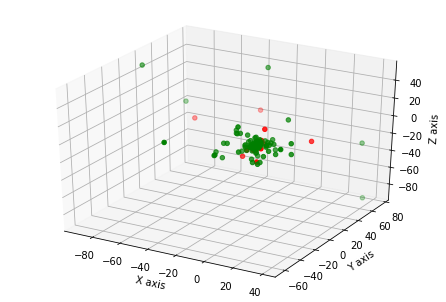

In [248]:
%matplotlib inline
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter3D(medx,medy,medz,c="black",marker='x')
ax.scatter3D(rx,ry,rz,c="red")
ax.scatter3D(px,py,pz,c="green")
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
pyplot.show()

# Assume no reddening

In [261]:
from astropy.table import Table


k = Table.read('Milky_Way_GCs.dat', format='ascii')

r = 3.1 #from powerpoint
Mv = 0.66 
nored = 10**((mv-Mv+5)/5)/1000  # in kpc
k.add_column(nored, name = 'Dist_nored')

ra = coord.Angle(k["RA(2000)"], unit=u.hour)
dec = coord.Angle(k["DEC(2000)"], unit=u.degree)
dist = coord.Distance(k["Dist_nored"],unit=u.kpc)

c= SkyCoord(ra=ra, dec=dec, distance=dist)


In [262]:
x = c.cartesian.x
y = c.cartesian.y
z = c.cartesian.z

medx = np.median(x)
medy = np.median(y)
medz = np.median(z)

#print(medx,medy,medz)

center = SkyCoord(x=medx,y=medy,z=medz, representation_type='cartesian')

csphere = center.spherical

print(csphere.lon.hms)
print(csphere.lat.deg)
print(csphere.distance)

hms_tuple(h=17.0, m=26.0, s=44.29584549524549)
-29.61223638525278
13.492605624736308 kpc


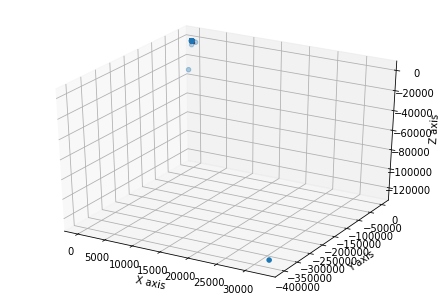

In [267]:
%matplotlib inline

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter3D(0,0,0,c="red",marker='X')
ax.scatter3D(medx,medy,medz,c="black",marker='x')
ax.scatter3D(x,y,z)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
pyplot.show()